In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
 # import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

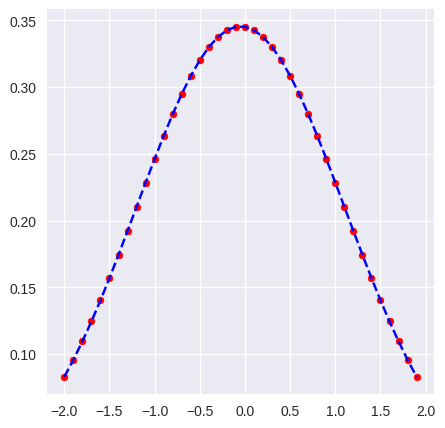

In [7]:
 #normal distribution - how to draw
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out =1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x- mean)**2 / (2 * std**2))
    return y_out

# to generate an array of x
x = np.arange(-2, 2, 0.1)
y = pdf(x)

#ploting the normal curve / bell curve  or gaussian distribution

plt.style.use('seaborn')
plt.figure(figsize=(5,5))

plt.plot(x,y, color = 'blue', linestyle = 'dashed')

plt.scatter(x,y, marker='o', s=25, color='red')



# Normal Distribution and its tests
1. import dataset
2. subsetting a dataset
3. visual test for normal distribution
   1. Histogram
   2. qq-norm plot
   3. 
4. statistical test

In [8]:
# import a dataset

kashti = sns.load_dataset('titanic')
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
#taking subsets
kashti = kashti[['sex','age','fare']]
kashti.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


<AxesSubplot:ylabel='Count'>

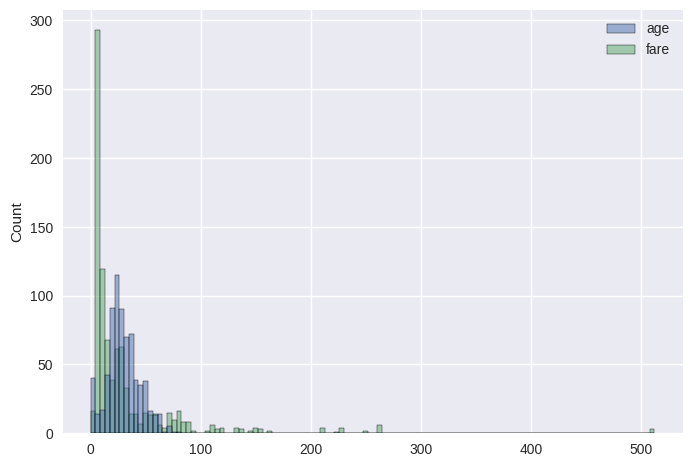

In [10]:
# histogram test
sns.histplot(kashti[['age', 'fare']])

<AxesSubplot:ylabel='Count'>

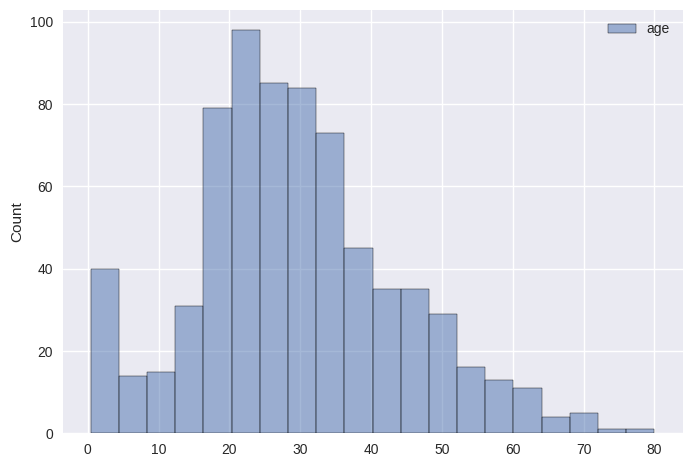

In [11]:
# histogram test
sns.histplot(kashti[['age']])

<AxesSubplot:ylabel='Count'>

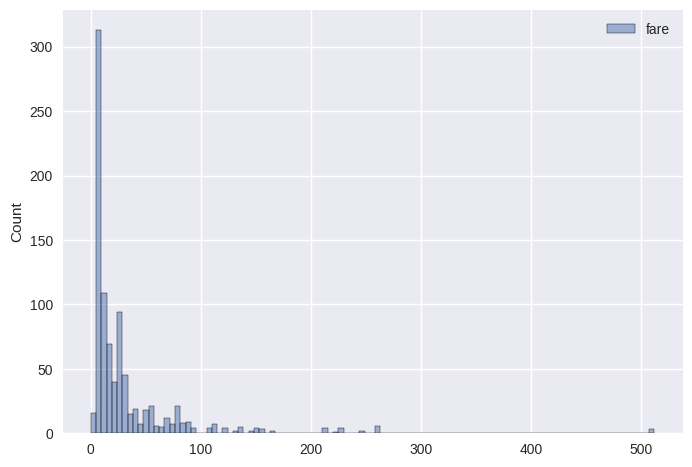

In [12]:
# histogram test
sns.histplot(kashti[['fare']])

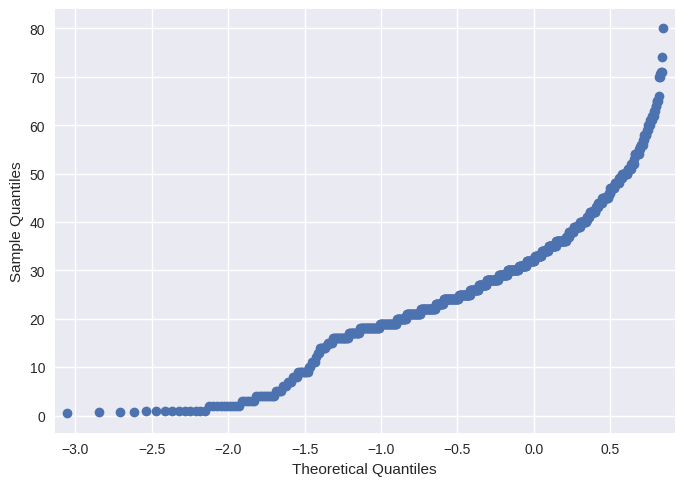

In [14]:
# qq plot
from statsmodels.graphics.gofplots import qqplot

# q-q norm plot
qqplot(kashti['age'])
plt.show()

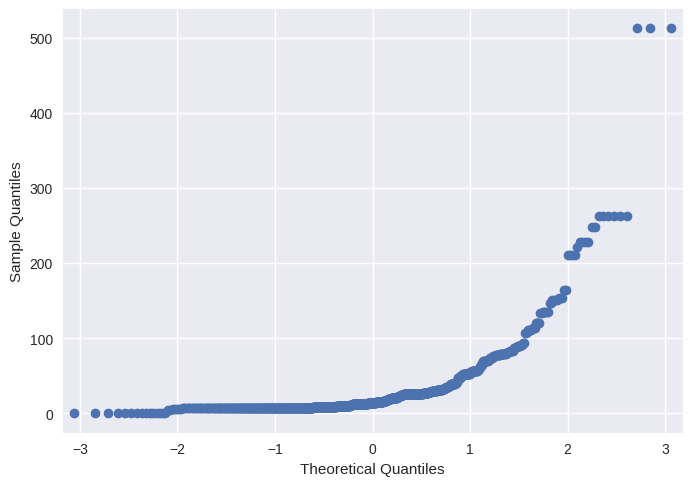

In [15]:

# q-q norm plot
qqplot(kashti['fare'])
plt.show()

## **1. Normality Tests**
There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution./
Each test makes different assumptions and considers different aspects of teh data./
we will look at 3 commonly used tests in this section that you can apply to your own data samples..
1. shapiro-wilk Test
2. D'Agostino's k^2 Test
3. Anderson-Darling Test
 
>**p <= alpha: reject H0, not normal.**\
>**p > alpha: fail to reject H0, normal.**

### 1. shapiro-wilk Test
The shapiro-wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution,named for Samuel Shapiro and Martin Wilk.

In practice,the Shapiro-Wilktest is believed to be reliable test of normality,although there is some suggestion that the test may be suitable for smaller samples of data,e.g.thousands of observations or fewer.

The shapiro() Scipy function will calculate the Shapiro-Wilk on a given dataset.The function returns both the W-statistic calculated by the test the p-value.

Assumptions

observations in each sample are independent and identically distributed.

Interpretation

 H0:the sample has a Gaussian distribution.
 
 H1:the sample does not have a Gaussian distribution.

 python code is here




In [18]:
# shapirowilk test


#import library
from scipy.stats import shapiro

stat,p = shapiro(kashti['age'])

print('stat=%.3f, p=%.3f' % (stat, p))


# make a coditional argument for further use
if p > 0.05:
    print('probably Gaussian or Normal Distribution')
else:
    print('probably not Gaussian nor normal distribution')

stat=nan, p=1.000
probably Gaussian or Normal Distribution


In [19]:
# D'Agostino's k^2 test


#import library
from scipy.stats import normaltest

stat,p = normaltest(kashti['age'])

print('stat=%.3f, p=%.3f' % (stat, p))


# make a coditional argument for further use
if p > 0.05:
    print('probably Gaussian or Normal Distribution')
else:
    print('probably not Gaussian nor normal distribution')

stat=nan, p=nan
probably not Gaussian nor normal distribution


In [20]:
### 3. Andreson-Darling Test
# A statistical test that can be used to evalute whether a data sample comes from one of among many known data samples, named for 
# Theodor Anderson and Donald Darling/

# it can be used to check whether a data sample is normal.The test is a modified version of a more sophisticated nonparametric 
# goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

#A feature of the Anderson-Darling test is that it retruns a list of critical vales  rather than a single p-value.This can provide the 
#basis for a more thorough interpretation of the result.

#The anderson()Scipy function implenents teh Anderson-Darling test.it takes as parameters the data sample and the data name of the 
#distribution to test it against.By default,the test will check against the Gaussian distribution(dist='norm).

#Assumptions

  #observations in each sample are independent and identically distributed.

#Interpretation

  #H0:the sample has a Gaussian distribution
  #H1:the sample does not have a Gaussian distribution

#python code is here:


### 3. Andreson-Darling Test
 A statistical test that can be used to evalute whether a data sample comes from one of among many known data samples, named for 
 Theodor Anderson and Donald Darling/

  it can be used to check whether a data sample is normal.The test is a modified version of a more sophisticated nonparametric 
  goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

  A feature of the Anderson-Darling test is that it retruns a list of critical vales  rather than a single p-value.This can provide the basis for a more thorough interpretation of the result.

  The anderson()Scipy function implenents teh Anderson-Darling test.it takes as parameters the data sample and the data name of the 
  distribution to test it against.By default,the test will check against the Gaussian distribution(dist='norm).

 Assumptions

   observations in each sample are independent and identically distributed.

 Interpretation

   H0:the sample has a Gaussian distribution
   H1:the sample does not have a Gaussian distribution

 python code is here:


In [21]:
from scipy.stats import anderson

# select a column to check the normal distribution
result = anderson(kashti['age'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    s1, cv =result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('probably Gaussion/Normal Distribution at the %.1f%% level' % (s1))
    else:
        print('probably not Gaussian/Normal Distribution at the %.1f%% level' %(s1))

stat=nan
probably not Gaussian/Normal Distribution at the 15.0% level
probably not Gaussian/Normal Distribution at the 10.0% level
probably not Gaussian/Normal Distribution at the 5.0% level
probably not Gaussian/Normal Distribution at the 2.5% level
probably not Gaussian/Normal Distribution at the 1.0% level
